<h1 align=center><font size = 5>Capstone Project - The Battle of Neighborhoods</font></h1>

## Introduction


As a part of this project,a problem statement needs to be identified that can take leverage of the Foursquare location data to come up with insights on solving the problem. Based on the problem statement identified, analysis need to be performed on the data to come up with insights on the best approach towards solving the problem. 


## Table of Contents:

* [Business Problem](#first-bullet)<br>
* [Data Section](#second-bullet)<br>
* [Methodology Section](#third-bullet)<br>
* [Results Section](#fourth-bullet)<br>
* [Discussion Section](#fifth-bullet)<br>
* [Conclusion Section](#sixth-bullet)<br>
    

## Business Problem <a class="anchor" id="first-bullet"></a>

A contractor is looking towards opening a restaurant in the city of Paris. The contractor has not yet decided on the neighborhood where he is going to open the restaurant. He has approached a data scientist to provide him some guidence based on the current trends in the available data and enable him to decide on the neighborhood for his restaurant with valid justification. Additionally, the contractor is also interested in knowing the cuisine that would attract the most customers in that area. As a data scientist, I would be using the Foursquare location data and other available datasets to analyse the current trends using graphs and other data visualization methods and create clusters to indicate similar neighborhoods eventually narrowing down on the neighborhood best suited for the restaurant.  


## Data Section<a class="anchor" id="second-bullet"></a>


As a part of this analysis, FourSquare location data would be used to identify the restaurants and it's types across various neighborhoods in Paris. This data would be plotted on a map using Folium and density of restaurants in each neighborhoods would be identified. 

An additional dataset would be used called food_coded.csv. This dataset is an open dataset found in Kaggle. For this project purpose, this dataset would be considered as the data collected from the various people in Paris. This dataset would contain details on their occupations, their food preferences and their willingness to eat at a restaurant. In cases where they are eating outside, their comfort foods which they would look out for are also recorded in this dataset. Based on these information, it would be possible to obtain an insight on the need of the customers and neighborhood which is in most need of a restaurant.

In the following cells an brief insight into this Food_coded dataset is provided :


Importing the food_coded dataset :

In [1]:
# The code was removed by Watson Studio for sharing.

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


**Additional information on the dataset**

Please note that this dataset would be processed to remove the columns that are not required for his analysis.

Some interesting information in the food_coded dataset that we might be using on this analysis are the following :

* Gender (1 – Female and 2 – Male)
* cook – how often do you cook?
* eating_out - frequency of eating out in a typical week 
* fav_cuisine - What is your favorite cuisine?
* fav_food - was your favorite food cooked at home or store bought? 
* marital_status
* on_off_campus – living situation
* parents_cook - Approximately how many days a week did your parents cook? 
* pay_meal_out - How much would you pay for meal out? 

Based on above information, we would be able to identify the target audience for our restaurant. This would mean, we would be able to decide would be the customers that have a higher chance of choosing this restaurant. Hence we could make the restaurant more appealing to these customers during the intial stage.

The above information would allow us to choose a speciality cuisine as well for the restaurant, provide us the pricing expectations.

Once we have the above information sorted out, we would be able to target the neighborhoods having higher percentage of these target customer using the venues in that we can retrive using the FourSquare API.

This would be my approach towards this problem.




**Population Density**<Br>
Another dataset that we would be using is population density dataset. Paris is divided into 20 Arrondissements. The population density of each androssements is provided in this dataset.
A peak in to the dataset is shown below:

In [2]:

body = client_29dd3f2ec22b497080dfc330d435b968.get_object(Bucket='capstoneproject-donotdelete-pr-fhypdazzhcgzk6',Key='PopulationDensity_Paris.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Arrondissement,Area (km2),Population,Population per km2
0,1,1.826,"17,268","9,457"
1,2,0.992,"22,558","22,740"
2,3,1.171,"36,727","31,364"
3,4,1.601,"28,068","17,532"
4,5,2.541,"61,080","24,038"


## Methodology Section <a class="anchor" id="third-bullet"></a>

**Finding the target customers**

For this step we would be using the food_coded dataset:
    

In [3]:
#Copying the dataset from dataframe df_data_1 to food_pref_df

food_pref_df = df_data_1 

food_pref_df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [4]:
#Removing all the other columns except the following columns :

# Gender (1 – Female and 2 – Male)
#cook
#eating_out
#fav_cuisine
#fav_food
#marital_status
#on_off_campus
#parents_cook
#pay_meal_out

food_pref_df.drop(['GPA', 'breakfast', 'calories_chicken', 'calories_day','calories_scone', 'coffee', 'comfort_food_reasons',
                     'comfort_food_reasons_coded', 'comfort_food_reasons_coded.1',
                     'diet_current', 'diet_current_coded', 'drink','eating_changes',
                     'eating_changes_coded', 'eating_changes_coded1','ethnic_food', 
                     'exercise','father_education', 'father_profession',  'food_childhood', 
                    'fries', 'fruit_day','grade_level', 'healthy_feeling', 'healthy_meal','ideal_diet', 
                    'ideal_diet_coded', 'life_rewarding', 'mother_education', 'mother_profession',
                    'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
                    'self_perception_weight', 'soup', 'sports','tortilla_calories','turkey_calories', 
                    'type_sports', 'veggies_day', 'vitamins', 'waffle_calories', 'weight'],
                     inplace = True, axis = 1)

food_pref_df.head()


,Gender,comfort_food,cook,cuisine,eating_out,employment,fav_cuisine,fav_cuisine_coded,fav_food,greek_food,income,indian_food,italian_food,marital_status,meals_dinner_friend,persian_food,thai_food
0,2,none,2.0,NaN,3,3.0,Arabic cuisine,3,1.0,5,5.0,5,5,1.0,"rice, chicken, soup",5.0,1
1,1,"chocolate, chips, ice cream",3.0,1.0,2,2.0,Italian,1,1.0,4,4.0,4,4,2.0,"Pasta, steak, chicken",4.0,2
2,1,"frozen yogurt, pizza, fast food",1.0,3.0,2,3.0,italian,1,3.0,5,6.0,5,5,2.0,"chicken and rice with veggies, pasta, some kin...",5.0,5
3,1,"Pizza, Mac and cheese, ice cream",2.0,2.0,2,3.0,Turkish,3,1.0,5,6.0,5,5,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,5.0,5
4,1,"Ice cream, chocolate, chips",1.0,2.0,2,2.0,Italian,1,3.0,4,6.0,2,5,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",2.0,4


In [5]:
food_pref_df.shape

(125, 17)

Filtering out the people who eat out frequently:

This is done based on the eating_out column.
eating_out - frequency of eating out in a typical week 
1 - Never 
2 - 1-2 times 
3 - 2-3 times 
4 - 3-5 times 
5 - every day

 Considering only people with eating_out greater than 2.

In [6]:
df_freq_eaters = food_pref_df[['Gender','eating_out','fav_cuisine','income','fav_cuisine_coded']]
df_freq_eaters.head()

,Gender,eating_out,fav_cuisine,income,fav_cuisine_coded
0,2,3,Arabic cuisine,5.0,3
1,1,2,Italian,4.0,1
2,1,2,italian,6.0,1
3,1,2,Turkish,6.0,3
4,1,2,Italian,6.0,1


In [7]:
df_freq_eaters.dtypes

Gender                 int64
eating_out             int64
fav_cuisine           object
income               float64
fav_cuisine_coded      int64
dtype: object

In [8]:

for i in range(0,df_freq_eaters.shape[0]):
    if df_freq_eaters.iloc[i]['fav_cuisine_coded'] == 1:
        df_freq_eaters.loc[i,'fav_cuisine'] = 'Italian/French/greek'
    elif df_freq_eaters.iloc[i]['fav_cuisine_coded'] == 2:
        df_freq_eaters.loc[i,'fav_cuisine'] = 'Spanish/mexican'
    elif df_freq_eaters.iloc[i]['fav_cuisine_coded'] == 3:
        df_freq_eaters.loc[i,'fav_cuisine'] = 'Arabic/Turkish'
    elif df_freq_eaters.iloc[i]['fav_cuisine_coded'] == 4:
        df_freq_eaters.loc[i,'fav_cuisine'] = 'asian/chineses/thai/nepal'        
    elif df_freq_eaters.iloc[i]['fav_cuisine_coded'] == 5:
        df_freq_eaters.loc[i,'fav_cuisine'] = 'American'
    elif df_freq_eaters.iloc[i]['fav_cuisine_coded'] == 6:
        df_freq_eaters.loc[i,'fav_cuisine'] = 'African '
    elif df_freq_eaters.iloc[i]['fav_cuisine_coded'] == 7:
        df_freq_eaters.loc[i,'fav_cuisine'] = 'Jamaican'        
    elif df_freq_eaters.iloc[i]['fav_cuisine_coded'] == 8:
        df_freq_eaters.loc[i,'fav_cuisine'] = 'Indian'        
    else:
        df_freq_eaters.loc[i,'fav_cuisine'] = 'none'        
        
df_freq_eaters.head()
        
        

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Gender,eating_out,fav_cuisine,income,fav_cuisine_coded
0,2,3,Arabic/Turkish,5.0,3
1,1,2,Italian/French/greek,4.0,1
2,1,2,Italian/French/greek,6.0,1
3,1,2,Arabic/Turkish,6.0,3
4,1,2,Italian/French/greek,6.0,1


In [9]:
df_freq_eaters = df_freq_eaters[df_freq_eaters['eating_out'] > 2]
df_freq_eaters.shape[0]

49

In [10]:
s_count = df_freq_eaters['fav_cuisine'].value_counts()
df_count = pd.DataFrame({'fav_cuisine':s_count.index, 'count':s_count.values})
df_count['%'] = (df_count['count'] / df_count['count'].sum()) * 100
df_count

,fav_cuisine,count,%
0,Italian/French/greek,25,51.020408
1,asian/chineses/thai/nepal,8,16.326531
2,Spanish/mexican,8,16.326531
3,American,5,10.204082
4,none,1,2.040816
5,Indian,1,2.040816
6,Arabic/Turkish,1,2.040816


In [11]:
df_count['%'] = (df_count['count'] / df_count['count'].sum()) * 100
df_count

,fav_cuisine,count,%
0,Italian/French/greek,25,51.020408
1,asian/chineses/thai/nepal,8,16.326531
2,Spanish/mexican,8,16.326531
3,American,5,10.204082
4,none,1,2.040816
5,Indian,1,2.040816
6,Arabic/Turkish,1,2.040816


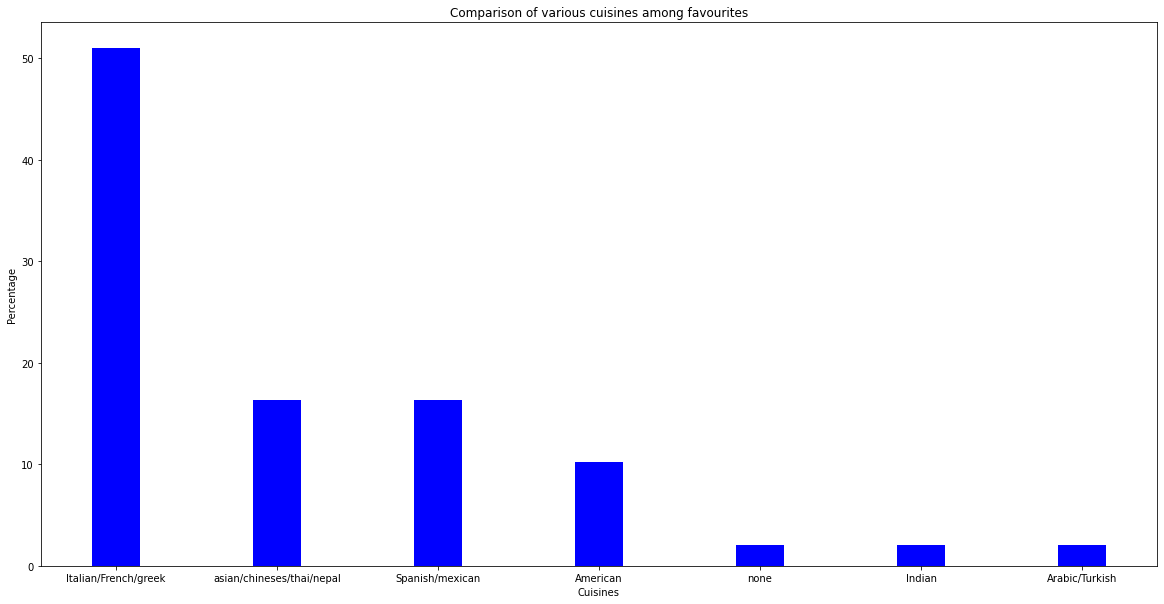

In [12]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = df_count['fav_cuisine']
  
# heights of bars 
height = df_count['%']
  
# labels for bars 
tick_label = df_count['fav_cuisine']

plt.figure(figsize=(20,10))
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label,
        width = 0.3, color = 'blue') 
  
# naming the x-axis 
plt.xlabel('Cuisines') 
# naming the y-axis 
plt.ylabel('Percentage') 
# plot title 
plt.title('Comparison of various cuisines among favourites') 
  
# function to show the plot 
plt.show() 

In [13]:
df_arrondissement = df_data_2

In [14]:
df_arrondissement['Name'] = ['Louvre','Bourse','Temple','Hôtel-de-Ville','Panthéon','Luxembourg','Palais-Bourbon','Élysée','Opéra','Entrepôt','Popincourt','Reuilly','Gobelins','Observatoire','Vaugirard','Passy','Batignolles-Monceau','Butte-Montmartre','Buttes-Chaumont','Ménilmontant']
df_arrondissement.head()

,Arrondissement,Area (km2),Population,Population per km2,Name
0,1,1.826,"17,268","9,457",Louvre
1,2,0.992,"22,558","22,740",Bourse
2,3,1.171,"36,727","31,364",Temple
3,4,1.601,"28,068","17,532",Hôtel-de-Ville
4,5,2.541,"61,080","24,038",Panthéon


In [15]:
df_arrondissement.head(20)

,Arrondissement,Area (km2),Population,Population per km2,Name
0,1,1.826,"17,268","9,457",Louvre
1,2,0.992,"22,558","22,740",Bourse
2,3,1.171,"36,727","31,364",Temple
3,4,1.601,"28,068","17,532",Hôtel-de-Ville
4,5,2.541,"61,080","24,038",Panthéon
5,6,2.154,"44,154","20,499",Luxembourg
6,7,4.088,"58,166","14,228",Palais-Bourbon
7,8,3.881,"39,409","10,154",Élysée
8,9,2.179,"60,293","27,670",Opéra
9,10,2.892,"95,436","33,000",Entrepôt


In [16]:
#coverting population per km into number from string 


import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')
'en_GB.UTF-8'
df_arrondissement['Population per km2'] = df_arrondissement[['Population per km2']].applymap(atof).apply(pd.to_numeric) 
#df_arrondissement[['Population per km2']] = df_arrondissement[['Population per km2']].apply(pd.to_numeric) 


In [17]:
df_arrondissement.dtypes

Arrondissement          int64
Area (km2)            float64
Population             object
Population per km2    float64
Name                   object
dtype: object

In [18]:
df_arrondissement['%'] = (df_arrondissement['Population per km2'] / df_arrondissement['Population per km2'].sum()) * 100
df_arrondissement

,Arrondissement,Area (km2),Population,Population per km2,Name,%
0,1,1.826,"17,268",9457.0,Louvre,1.881470
1,2,0.992,"22,558",22740.0,Bourse,4.524122
2,3,1.171,"36,727",31364.0,Temple,6.239866
3,4,1.601,"28,068",17532.0,Hôtel-de-Ville,3.487990
4,5,2.541,"61,080",24038.0,Panthéon,4.782359
5,6,2.154,"44,154",20499.0,Luxembourg,4.078275
6,7,4.088,"58,166",14228.0,Palais-Bourbon,2.830660
7,8,3.881,"39,409",10154.0,Élysée,2.020138
8,9,2.179,"60,293",27670.0,Opéra,5.504945
9,10,2.892,"95,436",33000.0,Entrepôt,6.565348


Only cities with more than 6% of total Paris population density have been considered for the below plot.<br> This 6% was chosen arbitrarily to filter out the arrondissements with low population density, as opening a restaurant in those arrondissements may lead to low customer turn over.

In [19]:
df_arrondissement_max = df_arrondissement[df_arrondissement['%'] > 6]
df_arrondissement_max

,Arrondissement,Area (km2),Population,Population per km2,Name,%
2,3,1.171,"36,727",31364.0,Temple,6.239866
9,10,2.892,"95,436",33000.0,Entrepôt,6.565348
10,11,3.666,"1,56,831",42780.0,Popincourt,8.511079
16,17,5.669,"1,71,945",30331.0,Batignolles-Monceau,6.034351
17,18,6.005,"2,02,780",33769.0,Butte-Montmartre,6.718341
19,20,5.984,"1,99,113",33274.0,Ménilmontant,6.619860


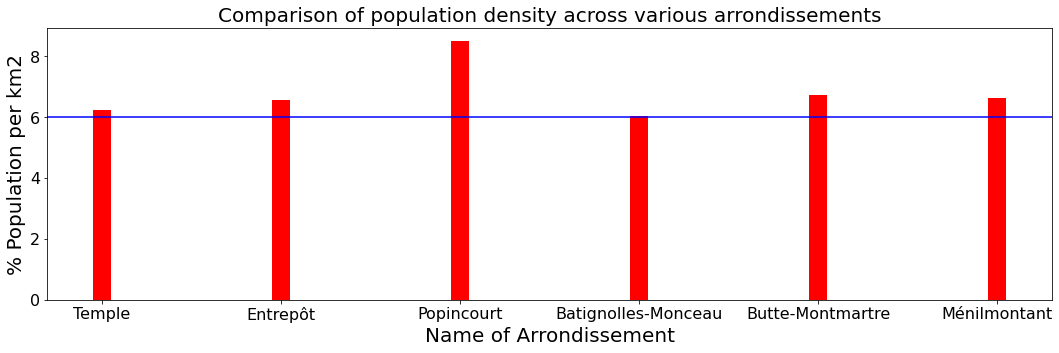

In [20]:
import matplotlib.pyplot as plt1 
plt1.rc('xtick',labelsize=16)
plt1.rc('ytick',labelsize=16)

# x-coordinates of left sides of bars  
left1 = df_arrondissement_max['Name']
  
# heights of bars 
height1 = df_arrondissement_max['%']
  
# labels for bars 
tick_label1 = df_arrondissement_max['Name']

plt1.figure(figsize=(18,5))
  
# plotting a bar chart 
plt1.bar(left1, height1, tick_label = tick_label1,
        width = 0.1, color = 'red') 
  
# naming the x-axis 
plt1.xlabel('Name of Arrondissement', fontsize=20) 
# naming the y-axis 
plt1.ylabel('% Population per km2', fontsize=20) 
# plot title 
plt1.title('Comparison of population density across various arrondissements', fontsize=20) 
plt1.axhline(y=6, color='b', linestyle='-')

plt1.rc('xtick',labelsize=16)
plt1.rc('ytick',labelsize=16)
  
# function to show the plot 
plt1.show() 

**Insights**<br>
For more number of customers to choose the new restaurant, it has to be in one of the above shown arrondissements, to have a decent customer base.<br>
Now lets look into the number of existing restaurants in these areas 

To find the latitude and longitudes of all the arrondissements:

In [21]:
df_arrondissement_max.reset_index(inplace = True, drop = True)
df_arrondissement_max.head(25)

,Arrondissement,Area (km2),Population,Population per km2,Name,%
0,3,1.171,"36,727",31364.0,Temple,6.239866
1,10,2.892,"95,436",33000.0,Entrepôt,6.565348
2,11,3.666,"1,56,831",42780.0,Popincourt,8.511079
3,17,5.669,"1,71,945",30331.0,Batignolles-Monceau,6.034351
4,18,6.005,"2,02,780",33769.0,Butte-Montmartre,6.718341
5,20,5.984,"1,99,113",33274.0,Ménilmontant,6.619860


In [22]:
from geopy.geocoders import Nominatim 

df_arrondissement_max['latitude'] = ''
df_arrondissement_max['longitude'] = ''

for i in range(0,df_arrondissement_max.shape[0]):
    #print(str(df_arrondissement_max.iloc[i]['Name']))
    address = "'" + df_arrondissement_max.iloc[i]['Name'] + ", Paris, France'" 
    #print(address)
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    df_arrondissement_max.loc[i,'latitude'] = location.latitude
    df_arrondissement_max.loc[i,'longitude'] = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(df_arrondissement_max.iloc[i]['Name'],df_arrondissement_max.iloc[i]['latitude'], df_arrondissement_max.iloc[i]['longitude']))
    
df_arrondissement_max.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

The geograpical coordinate of Temple are 48.8665004, 2.360708.
The geograpical coordinate of Entrepôt are 48.8761258, 2.3598394.
The geograpical coordinate of Popincourt are 48.858416, 2.379703.
The geograpical coordinate of Batignolles-Monceau are 48.8811759, 2.3157797.
The geograpical coordinate of Butte-Montmartre are 48.8900117, 2.3464668.
The geograpical coordinate of Ménilmontant are 48.8667079, 2.3833739.


,Arrondissement,Area (km2),Population,Population per km2,Name,%,latitude,longitude
0,3,1.171,"36,727",31364.0,Temple,6.239866,48.8665,2.36071
1,10,2.892,"95,436",33000.0,Entrepôt,6.565348,48.8761,2.35984
2,11,3.666,"1,56,831",42780.0,Popincourt,8.511079,48.8584,2.3797
3,17,5.669,"1,71,945",30331.0,Batignolles-Monceau,6.034351,48.8812,2.31578
4,18,6.005,"2,02,780",33769.0,Butte-Montmartre,6.718341,48.89,2.34647


FourSquare Credentials :

In [105]:
# The code was removed by Watson Studio for sharing.

In [106]:
#Function to get venue details

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['arrondissement', 
                  'arrondissement Latitude', 
                  'arrondissement Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
import requests # library to handle requests
paris_venues = getNearbyVenues(names=df_arrondissement_max['Name'],
                                   latitudes=df_arrondissement_max['latitude'],
                                   longitudes=df_arrondissement_max['longitude']
                                  )

Temple
Entrepôt
Popincourt
Batignolles-Monceau
Butte-Montmartre
Ménilmontant


In [26]:
paris_venues

,arrondissement,arrondissement Latitude,arrondissement Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Temple,48.866500,2.360708,Monoprix,48.866150,2.361548,Supermarket
1,Temple,48.866500,2.360708,Anahi,48.867002,2.358244,Argentinian Restaurant
2,Temple,48.866500,2.360708,La Massara,48.866098,2.359550,Italian Restaurant
3,Temple,48.866500,2.360708,0fr.,48.865746,2.361236,Bookstore
4,Temple,48.866500,2.360708,Lily of the Valley,48.865221,2.361990,Tea Room
...,...,...,...,...,...,...,...
450,Ménilmontant,48.866708,2.383374,Théâtre Le Passage vers les Étoiles,48.862900,2.382732,Theater
451,Ménilmontant,48.866708,2.383374,La Trattoria de Gigi,48.865495,2.377498,Italian Restaurant
452,Ménilmontant,48.866708,2.383374,Hôtel Verlain,48.864985,2.377787,Hotel
453,Ménilmontant,48.866708,2.383374,Et La Tendresse B,48.864131,2.386271,Café


Number of venues returned for each arrondissement

In [27]:
paris_venues.groupby('arrondissement').count()

,arrondissement Latitude,arrondissement Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
arrondissement,,,,,,
Batignolles-Monceau,42,42,42,42,42,42
Butte-Montmartre,69,69,69,69,69,69
Entrepôt,100,100,100,100,100,100
Ménilmontant,65,65,65,65,65,65
Popincourt,79,79,79,79,79,79
Temple,100,100,100,100,100,100


In [28]:
paris_venues["Venue Category"] = paris_venues["Venue Category"].str.lower()
paris_venues

,arrondissement,arrondissement Latitude,arrondissement Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Temple,48.866500,2.360708,Monoprix,48.866150,2.361548,supermarket
1,Temple,48.866500,2.360708,Anahi,48.867002,2.358244,argentinian restaurant
2,Temple,48.866500,2.360708,La Massara,48.866098,2.359550,italian restaurant
3,Temple,48.866500,2.360708,0fr.,48.865746,2.361236,bookstore
4,Temple,48.866500,2.360708,Lily of the Valley,48.865221,2.361990,tea room
...,...,...,...,...,...,...,...
450,Ménilmontant,48.866708,2.383374,Théâtre Le Passage vers les Étoiles,48.862900,2.382732,theater
451,Ménilmontant,48.866708,2.383374,La Trattoria de Gigi,48.865495,2.377498,italian restaurant
452,Ménilmontant,48.866708,2.383374,Hôtel Verlain,48.864985,2.377787,hotel
453,Ménilmontant,48.866708,2.383374,Et La Tendresse B,48.864131,2.386271,café


In [29]:
paris_restaurants = paris_venues[paris_venues["Venue Category"].str.contains("restaurant")]
paris_restaurants.reset_index(inplace = True,drop = True)
paris_restaurants

,arrondissement,arrondissement Latitude,arrondissement Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Temple,48.866500,2.360708,Anahi,48.867002,2.358244,argentinian restaurant
1,Temple,48.866500,2.360708,La Massara,48.866098,2.359550,italian restaurant
2,Temple,48.866500,2.360708,L'Aller Retour,48.865247,2.363203,french restaurant
3,Temple,48.866500,2.360708,La Rusidda,48.866093,2.357596,italian restaurant
4,Temple,48.866500,2.360708,Pramil,48.866815,2.358704,french restaurant
...,...,...,...,...,...,...,...
167,Ménilmontant,48.866708,2.383374,Massale,48.863410,2.379821,french restaurant
168,Ménilmontant,48.866708,2.383374,Madoura,48.863133,2.379564,indian restaurant
169,Ménilmontant,48.866708,2.383374,Zagros,48.863488,2.386807,greek restaurant
170,Ménilmontant,48.866708,2.383374,La Trattoria de Gigi,48.865495,2.377498,italian restaurant


In [30]:
paris_restaurants['Venue Category'].unique() 

array(['argentinian restaurant', 'italian restaurant',
       'french restaurant', 'seafood restaurant', 'vietnamese restaurant',
       'restaurant', 'chinese restaurant', 'japanese restaurant',
       'moroccan restaurant', 'korean restaurant',
       'cajun / creole restaurant', 'modern european restaurant',
       'vegetarian / vegan restaurant', 'mediterranean restaurant',
       'african restaurant', 'shanxi restaurant', 'thai restaurant',
       'asian restaurant', 'spanish restaurant', 'indian restaurant',
       'fast food restaurant', 'gluten-free restaurant',
       'mexican restaurant', 'lebanese restaurant',
       'ethiopian restaurant', 'south american restaurant',
       'comfort food restaurant', 'afghan restaurant', 'greek restaurant',
       'middle eastern restaurant', 'basque restaurant',
       'latin american restaurant', 'kebab restaurant'], dtype=object)

In [33]:
for i in range(0,paris_restaurants.shape[0]):
    if ((paris_restaurants.iloc[i]['Venue Category'].str.contains("italian"))
    or (paris_restaurants.iloc[i]['Venue Category'].str.contains("french")) 
    or (paris_restaurants.iloc[i]['Venue Category'].str.contains("greek"))
    or (paris_restaurants.iloc[i]['Venue Category'].str.contains("modern european"))):
        paris_restaurants.loc[i,'cuisine'] = 'Italian/French/greek'
        
    elif ((paris_restaurants.iloc[i]['Venue Category'].str.contains("spanish"))
      or (paris_restaurants.iloc[i]['Venue Category'].str.contains("mexican"))): 
        paris_restaurants.loc[i,'cuisine'] = 'Spanish/Mexican'
        
    elif ((paris_restaurants.iloc[i]['Venue Category'].str.contains("asian"))
    or (paris_restaurants.iloc[i]['Venue Category'].str.contains("chineses")) 
    or (paris_restaurants.iloc[i]['Venue Category'].str.contains("thai"))
    or (paris_restaurants.iloc[i]['Venue Category'].str.contains("nepal"))):
        paris_restaurants.loc[i,'cuisine'] = 'Asian/Chineses/Thai/Nepal'
        
    elif ((paris_restaurants.iloc[i]['Venue Category'].str.contains("arabic"))
      or (paris_restaurants.iloc[i]['Venue Category'].str.contains("turkish"))
      or (paris_restaurants.iloc[i]['Venue Category'].str.contains("middle eastern"))):
        paris_restaurants.loc[i,'cuisine'] = 'Arabic/Turkish'        
        
        
    elif (paris_restaurants.iloc[i]['Venue Category'].str.contains("American")):
        paris_restaurants.loc[i,'cuisine'] = 'American'
        
    elif (paris_restaurants.iloc[i]['Venue Category'].str.contains("Indian")):
        paris_restaurants.loc[i,'cuisine'] = 'Indian '
        
    else:
        paris_restaurants.loc[i,'cuisine'] = 'Others'        
        
df_freq_eaters.head()

AttributeError: 'str' object has no attribute 'str'

In [37]:
for i in range(0,paris_restaurants.shape[0]):
    if (("italian" in paris_restaurants.iloc[i]['Venue Category'])
    or ("french"  in paris_restaurants.iloc[i]['Venue Category']) 
    or ("greek" in paris_restaurants.iloc[i]['Venue Category'])
    or ("modern european" in paris_restaurants.iloc[i]['Venue Category'])):
        paris_restaurants.loc[i,'cuisine'] = 'Italian/French/greek'
        
    elif (("spanish" in paris_restaurants.iloc[i]['Venue Category'])
      or ("mexican" in paris_restaurants.iloc[i]['Venue Category'])): 
        paris_restaurants.loc[i,'cuisine'] = 'Spanish/Mexican'
        
    elif (("asian" in paris_restaurants.iloc[i]['Venue Category'])
    or ("chineses" in paris_restaurants.iloc[i]['Venue Category']) 
    or ("thai" in paris_restaurants.iloc[i]['Venue Category'])
    or ("nepal" in paris_restaurants.iloc[i]['Venue Category'])):
        paris_restaurants.loc[i,'cuisine'] = 'Asian/Chineses/Thai/Nepal'
        
    elif (("arabic" in paris_restaurants.iloc[i]['Venue Category'])
      or ("turkish" in paris_restaurants.iloc[i]['Venue Category'])
      or ("middle eastern" in paris_restaurants.iloc[i]['Venue Category'])):
        paris_restaurants.loc[i,'cuisine'] = 'Arabic/Turkish'        
        
        
    elif ("American" in paris_restaurants.iloc[i]['Venue Category']):
        paris_restaurants.loc[i,'cuisine'] = 'American'
        
    elif ("Indian" in paris_restaurants.iloc[i]['Venue Category']):
        paris_restaurants.loc[i,'cuisine'] = 'Indian '
        
    else:
        paris_restaurants.loc[i,'cuisine'] = 'Others'        
        
paris_restaurants.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,arrondissement,arrondissement Latitude,arrondissement Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cuisine
0,Temple,48.8665,2.360708,Anahi,48.867002,2.358244,argentinian restaurant,Others
1,Temple,48.8665,2.360708,La Massara,48.866098,2.359550,italian restaurant,Italian/French/greek
2,Temple,48.8665,2.360708,L'Aller Retour,48.865247,2.363203,french restaurant,Italian/French/greek
3,Temple,48.8665,2.360708,La Rusidda,48.866093,2.357596,italian restaurant,Italian/French/greek
4,Temple,48.8665,2.360708,Pramil,48.866815,2.358704,french restaurant,Italian/French/greek


In [42]:
paris_restaurants_grp = paris_restaurants.groupby(['arrondissement', 'cuisine']).size().to_frame() 
paris_restaurants_grp

0
arrondissement      cuisine                      
Batignolles-Monceau Arabic/Turkish              1
                    Asian/Chineses/Thai/Nepal   1
                    Italian/French/greek       14
                    Others                      9
Butte-Montmartre    Arabic/Turkish              3
                    Asian/Chineses/Thai/Nepal   1
                    Italian/French/greek       14
                    Others                      9
Entrepôt            Asian/Chineses/Thai/Nepal   4
                    Italian/French/greek       13
                    Others                     22
                    Spanish/Mexican             2
Ménilmontant        Arabic/Turkish              1
                    Asian/Chineses/Thai/Nepal   1
                    Italian/French/greek        5
                    Others                      9
Popincourt          Asian/Chineses/Thai/Nepal   1
                    Italian/French/greek       12
                    Others                     18
Temple              Italian/French/greek       15
                    Others                     17

We would use the above table as a reference to verify the counts after using get_dummies for obtaining required columns.

In [50]:
dummy_restaurants = paris_restaurants

In [51]:
dummy_cuisine = pd.get_dummies(dummy_restaurants['cuisine']) 

In [52]:
dummy_cuisine

,Arabic/Turkish,Asian/Chineses/Thai/Nepal,Italian/French/greek,Others,Spanish/Mexican
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
167,0,0,1,0,0
168,0,0,0,1,0
169,0,0,1,0,0
170,0,0,1,0,0


In [53]:
dummy_restaurants = pd.concat([dummy_restaurants,dummy_cuisine], axis = 1)
dummy_restaurants

,arrondissement,arrondissement Latitude,arrondissement Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cuisine,Arabic/Turkish,Asian/Chineses/Thai/Nepal,Italian/French/greek,Others,Spanish/Mexican
0,Temple,48.866500,2.360708,Anahi,48.867002,2.358244,argentinian restaurant,Others,0,0,0,1,0
1,Temple,48.866500,2.360708,La Massara,48.866098,2.359550,italian restaurant,Italian/French/greek,0,0,1,0,0
2,Temple,48.866500,2.360708,L'Aller Retour,48.865247,2.363203,french restaurant,Italian/French/greek,0,0,1,0,0
3,Temple,48.866500,2.360708,La Rusidda,48.866093,2.357596,italian restaurant,Italian/French/greek,0,0,1,0,0
4,Temple,48.866500,2.360708,Pramil,48.866815,2.358704,french restaurant,Italian/French/greek,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Ménilmontant,48.866708,2.383374,Massale,48.863410,2.379821,french restaurant,Italian/French/greek,0,0,1,0,0
168,Ménilmontant,48.866708,2.383374,Madoura,48.863133,2.379564,indian restaurant,Others,0,0,0,1,0
169,Ménilmontant,48.866708,2.383374,Zagros,48.863488,2.386807,greek restaurant,Italian/French/greek,0,0,1,0,0
170,Ménilmontant,48.866708,2.383374,La Trattoria de Gigi,48.865495,2.377498,italian restaurant,Italian/French/greek,0,0,1,0,0


In [65]:
dummy_restaurants_grp = dummy_restaurants[['arrondissement', 'Arabic/Turkish','Asian/Chineses/Thai/Nepal','Italian/French/greek','Spanish/Mexican','Others']]
stats = dummy_restaurants_grp.groupby(by='arrondissement').sum()
stats

#df_count['%'] = (df_count['count'] / df_count['count'].sum()) * 100

,Arabic/Turkish,Asian/Chineses/Thai/Nepal,Italian/French/greek,Spanish/Mexican,Others
arrondissement,,,,,
Batignolles-Monceau,1,1,14,0,9
Butte-Montmartre,3,1,14,0,9
Entrepôt,0,4,13,2,22
Ménilmontant,1,1,5,0,9
Popincourt,0,1,12,0,18
Temple,0,0,15,0,17


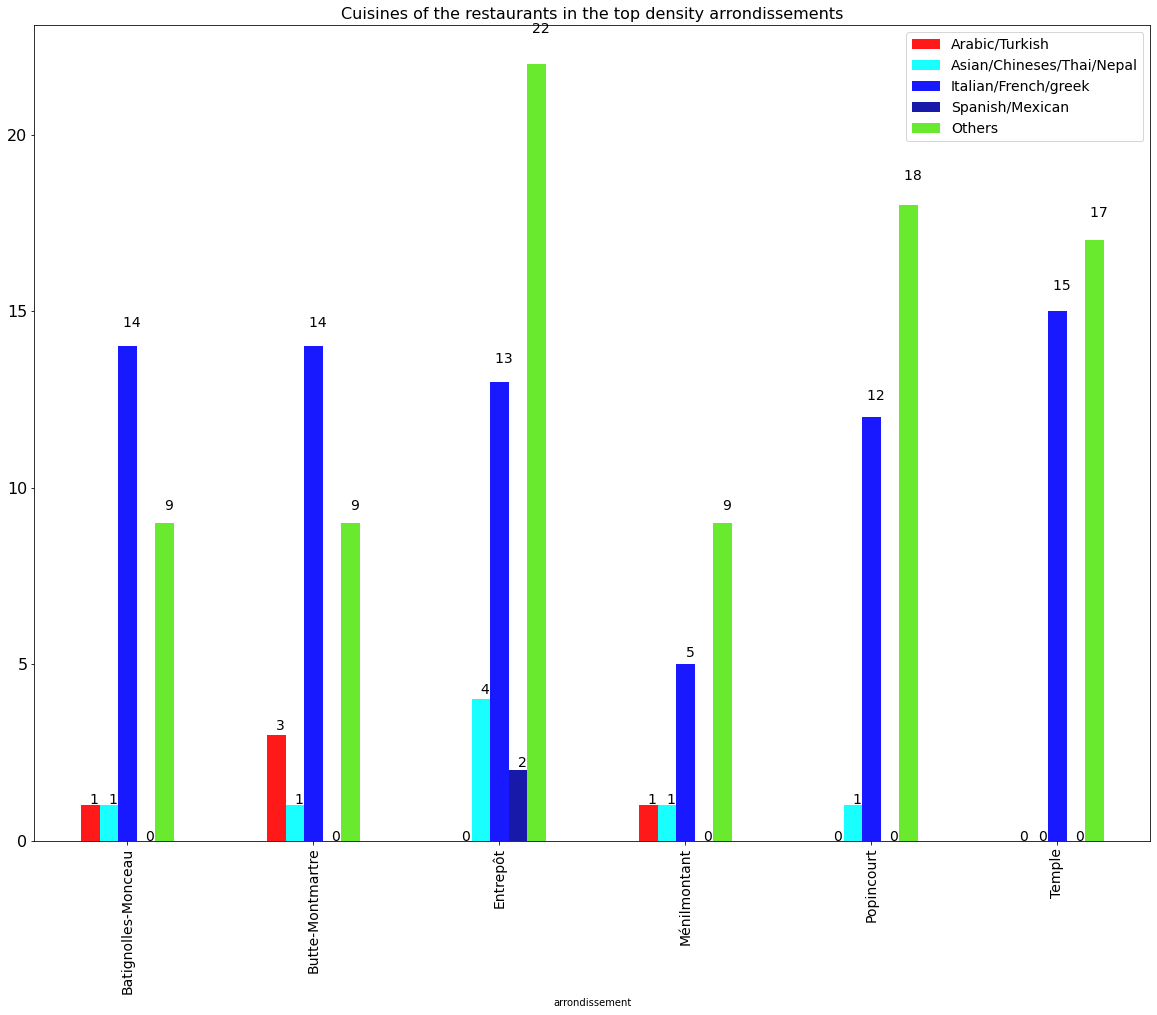

In [104]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.style.use('ggplot') # optional: for ggplot-like style
#fig, ax = plt.subplots(figsize=(20, 8))
#ax.bar(df_percent1.index.values.tolist(),df_percent1['Very interested %'], alpha=0.90,color="#5cb85c")
#ax.bar(df_percent2.index.values.tolist(),df_percent2['Somewhat interested %'], alpha=0.90,color="#5bc0de")



ax = stats.plot(kind='bar', alpha=0.90,color=("#FF0000","#00FFFF","#0000FF","#0000A0","#59E817"), width = 0.5, figsize=(20, 15))
ax.set_title("Cuisines of the restaurants in the top density arrondissements", {'fontsize': 16})


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    #ax.text(f'{height}%', (x + width/2, y + height*1.04), ha='center')
    ax.text((x + width/2), (y + height*1.04), str(f'  {height}') ,horizontalalignment='center',fontsize=14)
    
# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.set_yticks([])
ax.legend(prop=dict(size=14))
ax.set_xticklabels(ax.get_xticklabels(),Fontsize=14 ) 
plt.draw()


In [79]:
!pip install folium

     |████████████████████████████████| 93 kB 3.3 MB/s  eta 0:00:01


In [94]:
paris_restaurants_1 = paris_restaurants[paris_restaurants['arrondissement'] == 'Batignolles-Monceau']
paris_restaurants_2 = paris_restaurants[paris_restaurants['arrondissement'] == 'Butte-Montmartre']
paris_restaurants_3 = paris_restaurants[paris_restaurants['arrondissement'] == 'Entrepôt']
paris_restaurants_4 = paris_restaurants[paris_restaurants['arrondissement'] == 'Ménilmontant']
paris_restaurants_5 = paris_restaurants[paris_restaurants['arrondissement'] == 'Popincourt']
paris_restaurants_6 = paris_restaurants[paris_restaurants['arrondissement'] == 'Temple']
 

In [102]:
import folium # map rendering library
latitude = 48.8566
longitude = 2.3529

# create map of Paris using latitude and longitude values
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map Batignolles-Monceau
for lat, lng, label in zip(paris_restaurants_1['Venue Latitude'], paris_restaurants_1['Venue Longitude'], paris_restaurants_1['arrondissement']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#ff0000',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
# add markers to map Butte-Montmartre
for lat, lng, label in zip(paris_restaurants_2['Venue Latitude'], paris_restaurants_2['Venue Longitude'], paris_restaurants_2['arrondissement']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Lime',
        fill=True,
        fill_color='#006600',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
# add markers to map Entrepôt
for lat, lng, label in zip(paris_restaurants_3['Venue Latitude'], paris_restaurants_3['Venue Longitude'], paris_restaurants_3['arrondissement']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Blue',
        fill=True,
        fill_color='#0000ff',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
# add markers to map Ménilmontant
for lat, lng, label in zip(paris_restaurants_4['Venue Latitude'], paris_restaurants_4['Venue Longitude'], paris_restaurants_4['arrondissement']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Yellow',
        fill=True,
        fill_color='Black',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
# add markers to map Popincourt
for lat, lng, label in zip(paris_restaurants_5['Venue Latitude'], paris_restaurants_5['Venue Longitude'], paris_restaurants_5['arrondissement']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#cc0099',
        fill=True,
        fill_color='#cc0099',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
# add markers to map Temple	
for lat, lng, label in zip(paris_restaurants_6['Venue Latitude'], paris_restaurants_6['Venue Longitude'], paris_restaurants_6['arrondissement']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#ff9900',
        fill=True,
        fill_color='#ff9900',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

The above map indicates the proximity of the restaurants with each other in each neighborhood:<br>
Batignolles-Monceau - Red Color spots <br>
Butte-Montmartre    - Lime Color spots<br>
Entrepôt            - blue color spots<br>
Ménilmontant        - yellow with black fill spots <br>
Popincourt          - purple color spots<br>
Temple              - orange color spots<br>

## Results Section <a class="anchor" id="Fourth-bullet"></a>

From the bar plot, it can be seen that Italian/French/greek cuisines had a significant higher value compared to the other cuisines like asian, chinese,spanish, mexican, arabic etc. In order to find population density across various arrondissements or neighborhoods in Paris. This can be observed in the bar plot 'Comparison of population density across various arrondissements'. From this bar plot, the top arrondissements with high population density can be infered. The plot 'Cuisines of the restaurants in the top density arrondissements' provides information on the cuisine of the restaurants present in the high density arrondissements or neighborhoods of Paris and we can see that the Ménilmontant has the least number of Italian/French/Greek cuisine restaurants. A map was also plotted which shows the proximity of the restaurants between each other in each neighborhood.

## Discussion Section <a class="anchor" id="fifth-bullet"></a>

Based on the plots discussed in the results section,the following observations were made:

1) Observations from the graph 'Comparison of various cuisines among favourites'
This plot provides insight on the preferences among the people who frequently dine out. Based on the plot it can be clearly seen that the Italian/Greek/French cuisine is the    cuisine that this section of people who dine out frequently prefer.

2) Observations from the graph 'Comparison of population density across various arrondissements' :
This plot provides an insight across the various high densely populated arrondissements in the city of Paris. From the plot, it can be understood that the most people live per sq kilometre in the following neighborhoods : 
Batignolles-Monceau
Butte-Montmartre
Entrepôt
Ménilmontant
Popincourt
Temple

3) Observations from the plot "Cuisines of the restaurants in the top density arrondissements"
This plot shows the numbers of restaurants on the various cuisines in neighborhood selected from the second graph.This shows that Ménilmontant has the least amount of Italian/Greek/French cuisine restaurant. Hence it is most proabale that the people might need a new Italian/French/Greek cuisine restaurant in this area.
   
   

## Conclusion Section <a class="anchor" id="sixth-bullet"></a>

From the above shown analysis and insights obtained from data visualization, it can be understood that there is a section of people in Paris who eat frequently in restaurants. A major portion of this section of people tend to like Italian/Greek/French cuisines. We can see that some of the neighborhoods are densely populated and hence has a chance of better customer incoming. Out of these neighborhoods/arrondissements we could see that Ménilmontant has very few Italian/Greek/French cuisine restaurants.
Based on these points, we conclude that we would recommend opening an Italian, Greek or a French restaurant in the arrondissement/neighborhood of Ménilmontant,Paris for the best outcome